# Stay-travel cluster classification in 1D: homebrew

## ToDos

* check that the newly split clusters are 
    * contain enough samples
    * have a total duration longer than the threshold
    * are not embedded within another cluster
* check that there are no embedded clusters
    * times don't overlap $\checkmark\to$ have function
    * if refined clusters are embedded, check if one cluster is noise
* check the stddev of the refined clusters are smaller

In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
# #############################################################################
%matplotlib inline
import matplotlib.pyplot as plt

## Make the artificial data: 1D1T

**note** "T" here means just the index; later, it could be considered "time"

## Regularize the data

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample `x` is calculated as:

    z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False`,
and `s` is the standard deviation of the training samples or one if
`with_std=False`.

## DBScan

### Parameters

The basic algorithmic usage
```
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
```

* `eps` : `float`, default=0.5
    * The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. 
    * This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

* `min_samples` : `int`, default=5
    * The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.


The main returns
```
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
```

# Sythetic data

In [4]:
import importlib
import synthetic_data

In [5]:
xxx = np.arange(0,100,0.1)

In [6]:
importlib.reload(synthetic_data);
from synthetic_data import get_1bump, get_bumps, get_noisy_bumps, get_mask

In [231]:
# NOTE:  "bump2_amp": -4.5
dc = {
        "bump1_amp":  -1.5, "bump1_slope": 0.5, "bump1_start": -20 , "bump1_end": 80,
        "bump2_amp": -0.5, "bump2_slope": 0.95, "bump2_start": 40 , "bump2_end": 50
     }

dc = {
        "bump1_amp":  0.5, "bump1_slope": 0.5, "bump1_start": 20 , "bump1_end": 60,\
        "bump2_amp": -1.0, "bump2_slope": 0.75, "bump2_start": 60 , "bump2_end": 80,\
        "bump3_amp": -1.5, "bump3_slope": 0.95, "bump3_start": 80 , "bump3_end": 90  
     }

dc_noise = {"bump1_eta": 0.15, "bump2_eta": 0.025, "bump3_eta": 0.025}

In [232]:
yyy = get_bumps(xxx, **dc)
dc.update(dc_noise)
yyyn = get_noisy_bumps(xxx, **dc)

In [233]:
new_mask = get_mask(xxx.size, 0.25)

In [234]:
xxxx = xxx[new_mask]
yyyy = yyyn[new_mask]

In [235]:
#new_X = np.array([[n] for n in get_noise(fff(xxxx))])
yyyy_ = yyyy.reshape(yyyy.size,1) #np.array([[n] for n in yyyy])
xxxx_ = xxxx.reshape(xxxx.size,1) #np.array([[n] for n in xxxx])

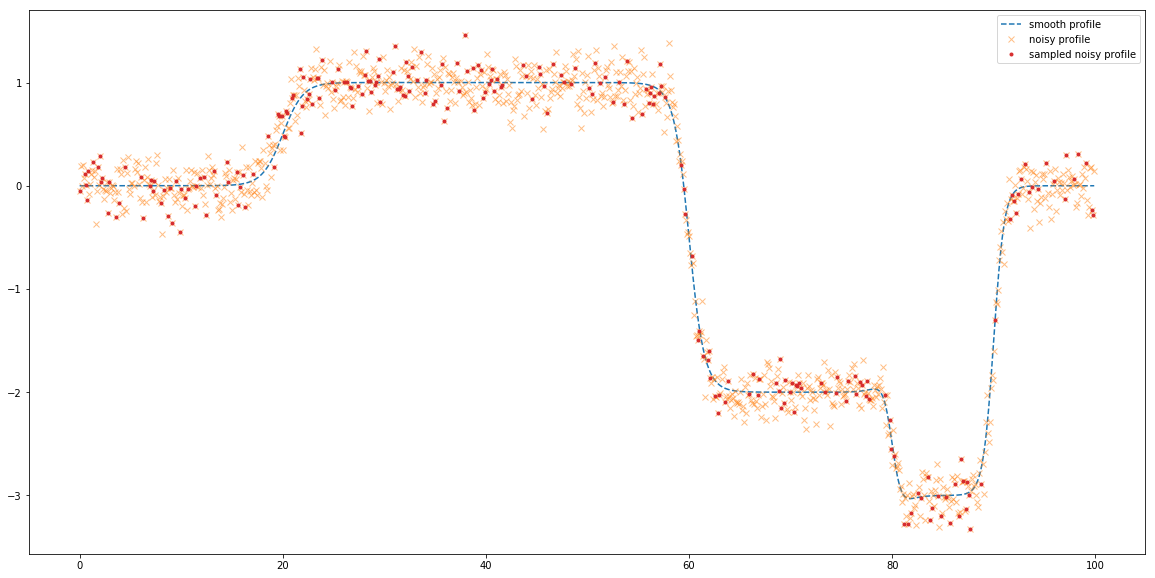

In [236]:
plt.figure(figsize=(20,10))
plt.plot(xxx, yyy, '--', label='smooth profile')
plt.plot(xxx, yyyn, 'x', alpha=0.5, label='noisy profile')
plt.plot(xxxx, yyyn[new_mask], '.', alpha=0.95, color="C3", label='sampled noisy profile')
plt.legend();

# Clustering

## Get intial clusters

## Split the clusters which have a temporal gap

In [237]:
time_thresh = 5.0
eps=0.25

In [238]:
clusters = list(range(yyyy.size))

In [239]:
get_err = lambda x1, x2: np.sqrt((x1-x2)**2) 

In [240]:
def get_clusters(times, positions, dist_thresh, time_thresh):

    clusters = []

    m = 0

    new_cluster = []
    for n in range(0,positions.size-3):

        # Check the time
        if times[n+1] <= times[n]+time_thresh:

            get_y = positions[n+1]

        else: 
            continue

        # Get the current cluster mean
        cluster_mean = np.mean(positions[m:n+1])

        # Get the potential cluster mean    
        new_cluster_mean = np.mean(positions[m:n+2])

        err1 = get_err(cluster_mean, get_y)
        err2 = get_err(cluster_mean, new_cluster_mean)

        #print(n, err1, err2, dist_thresh)

        if  (err1 < dist_thresh) & (err2 < dist_thresh) & \
            (n <= positions.size-5):

            new_cluster.append(n)
            #print(len(new_cluster))
        else:
            txt = f'Trying {n} '
            app = "Nope"
            if (len(new_cluster) >= 2):
                if (times[new_cluster[-1]]-times[new_cluster[0]] > time_thresh):
                    clusters.append(new_cluster)
                    app = 'closed'
            #print(txt+app)

            new_cluster = []

            m=n+1
            
    return clusters

In [241]:
clusters = get_clusters(xxxx,yyyy,0.6,time_thresh)
len(clusters)

5

In [242]:
for clust in clusters:
    print(clust)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]
[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
[164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205]
[209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228]
[231,

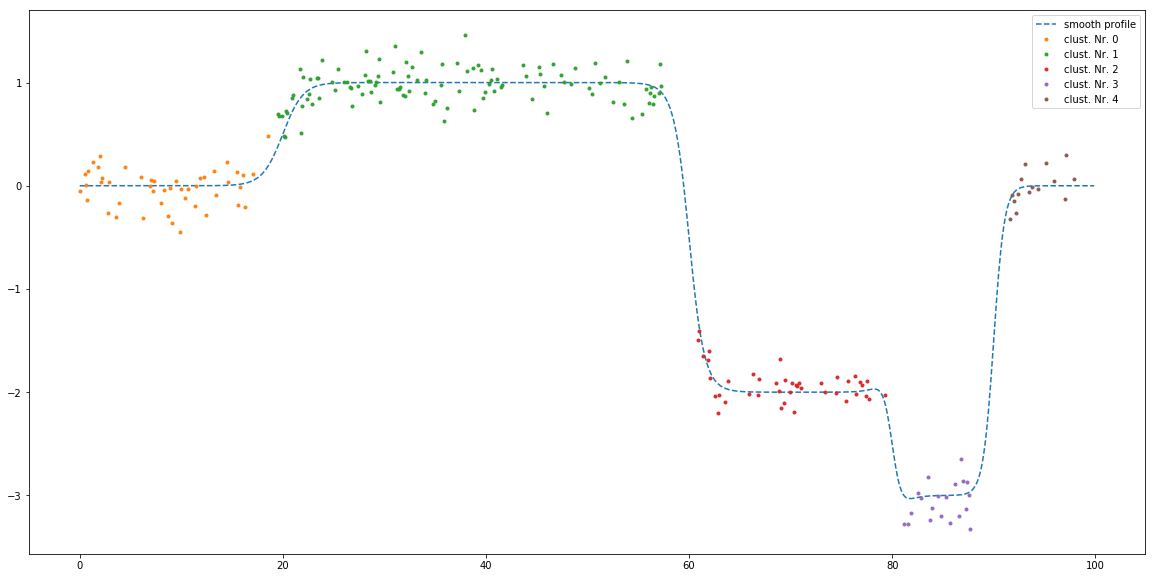

In [243]:
plt.figure(figsize=(20,10))

plt.plot(xxx, yyy, '--', label='smooth profile')

for cl_nr, clust in enumerate(clusters):
    plt.plot(xxxx[clust], yyyy[clust], '.', alpha=0.95, label=f'clust. Nr. {cl_nr}')

plt.legend();

In [244]:
# Calculate first and third quartile
# the the quantiled std
q25 = np.quantile(xxxx[m:nn],0.25, interpolation='lower')
q75 = np.quantile(xxxx[m:nn],0.75, interpolation='higher')

# Interquartile range
iqr = q75 - q25

# Remove outliers
q75_ind = np.max(np.where(xxxx[m:nn] < (q75 + 3 * iqr)))
q25_ind = np.min(np.where(xxxx[m:nn] > (q25 - 3 * iqr)))

In [245]:
m=0
nn=117
q25 = np.quantile(yyyy[m:nn],0.25, interpolation='lower')
q75 = np.quantile(yyyy[m:nn],0.75, interpolation='higher')

print(np.quantile(yyyy[m:nn],[0.25, 0.5, 0.75], interpolation='higher'))
#print()

#print(np.sort(yyyy[m:nn]))
# Interquartile range

iqr = abs(q75 - q25)
iqr_fact = 3

print()
print(q25, q75, iqr,(q25 - iqr_fact * iqr), (q75 + iqr_fact * iqr))
iqr_fact = 0
print(m, nn, np.where((yyyy[m:nn] > (q25 - iqr_fact * iqr)) & (yyyy[m:nn] < (q75 + iqr_fact * iqr))))
mask=np.where((yyyy[m:nn] > (q25 - iqr_fact * iqr)) & (yyyy[m:nn] < (q75 + iqr_fact * iqr)))
print(yyyy[m:nn].size, np.std(yyyy[m:nn]),yyyy[mask].size, np.std(yyyy[mask]))

[0.04847342 0.75604309 1.00249053]

0.048473419549194416 1.002490528870305 0.9540171093211106 -2.8135779084141372 3.864541856833637
0 117 (array([  1,   4,   5,   6,   7,   9,  14,  15,  18,  33,  34,  36,  38,
        40,  43,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  58,  59,  61,  62,  64,  67,  70,  73,  74,  75,  76,  77,
        78,  83,  84,  88,  91,  92,  93,  94,  95,  98, 102, 104, 105,
       106, 108, 109, 111, 115]),)
117 0.5134104432889683 57 0.3308408573769119


In [246]:
np.std(yyyy[0:119])

0.5123608687771048

In [247]:
def get_iqr_masked(positions, iqr_fact = 3):
    # Calculate first and third quartiles
    q25 = np.quantile(positions,0.25, interpolation='lower')
    q75 = np.quantile(positions,0.75, interpolation='higher')

    # Calculate the interquartile range (IQR)
    iqr = abs(q75 - q25)

    #print(m, nn, np.where((yyyy[m:nn] > (q25 - iqr_fact * iqr)) & (yyyy[m:nn] < (q75 + iqr_fact * iqr))))
    mask=np.where(  (positions > (q25 - iqr_fact * iqr)) \
                  & (positions < (q75 + iqr_fact * iqr)))    
    
    return mask

def get_iqr_std(positions, iqr_fact = 3):
    
    mask=get_iqr_masked(positions, iqr_fact)
    
    return np.std(positions[mask])

In [248]:
def get_batch_clusters(times, positions, dist_thresh, time_thresh):

    max_len = positions.size-6
    
    clusters = []

    ind = 0
    
    cluster = [0]
    
    last_time_point = times[cluster[0]]

    m = 0    
    
    while ind < max_len:

        
        # Set the time buffer around the last point of the current cluster
        nn=m+1
        while (times[nn]-last_time_point <= time_thresh) & (nn<=max_len):
            nn+=1

        #print(m,nn, positions[m:nn].shape)
        
        if positions[m:nn].size > 1:
            
            # Get the current cluster std
            cluster_std = np.std(positions[m:nn])
            cluster_qstd = get_iqr_std(positions[m:nn])
            
        else:
            cluster_std = 0.0
            cluster_qstd = 0.0
        
        nnn=nn
        while ((positions[m:nnn].size > 1) & ((cluster_std >= dist_thresh) | (cluster_qstd >= dist_thresh))):
            print('\t\trefinement', nnn, cluster_std, cluster_qstd)
            # Get the current cluster std
            cluster_std = np.std(positions[m:nnn])
            cluster_qstd = get_iqr_std(positions[m:nnn])
            nnn-=1

        # Check!
        print('STD-testing at', nn, cluster_std, cluster_qstd, dist_thresh)
        # 
        new_cluster = list(range(m,nnn+1))

        # if the std's are good, keep the cluster, and update the final time point
        if  (cluster_std < dist_thresh) & (cluster_qstd < dist_thresh) & (nnn<max_len) & (nnn==nn) :

            last_time_point = times[nnn]
            ind = nnn

        else:
            txt = f'Trying {len(new_cluster)} '
            app = "Nope"
            if (len(new_cluster) >= 2):
                if (times[new_cluster[-1]]-times[new_cluster[0]] > time_thresh):
                    clusters.append(new_cluster)
                    app = 'closed'
            print(txt+app)

            new_cluster = []
            if (nnn==nn):
                ind=nn
                m=nn
            else:
                ind=nnn
                m=nnn
            
    return clusters

In [249]:
clusters = get_batch_clusters(xxxx,yyyy,0.2,time_thresh)
len(clusters)

STD-testing at 15 0.17273203660174716 0.17273203660174716 0.2
STD-testing at 31 0.17844816844172115 0.17844816844172115 0.2
STD-testing at 45 0.17121041333082884 0.17121041333082884 0.2
		refinement 61 0.3607015387341947 0.34021699098522523
		refinement 60 0.3607015387341947 0.34021699098522523
		refinement 59 0.3440967464671431 0.3440967464671431
		refinement 58 0.3365793394243316 0.3365793394243316
		refinement 57 0.3355648109597895 0.3098344600321521
		refinement 56 0.3098344600321521 0.3098344600321521
		refinement 55 0.2942026670678946 0.2942026670678946
		refinement 54 0.27792528807864064 0.27792528807864064
		refinement 53 0.2666456012177621 0.2666456012177621
		refinement 52 0.25259096092028316 0.25259096092028316
		refinement 51 0.24792494019993971 0.24792494019993971
		refinement 50 0.24222240227502428 0.24222240227502428
		refinement 49 0.22627070829903204 0.22627070829903204
		refinement 48 0.20787306638013783 0.20787306638013783
STD-testing at 61 0.18434518702997713 0.1843

5

In [250]:
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 10)]

from random import shuffle

In [251]:
shuffle(colors)

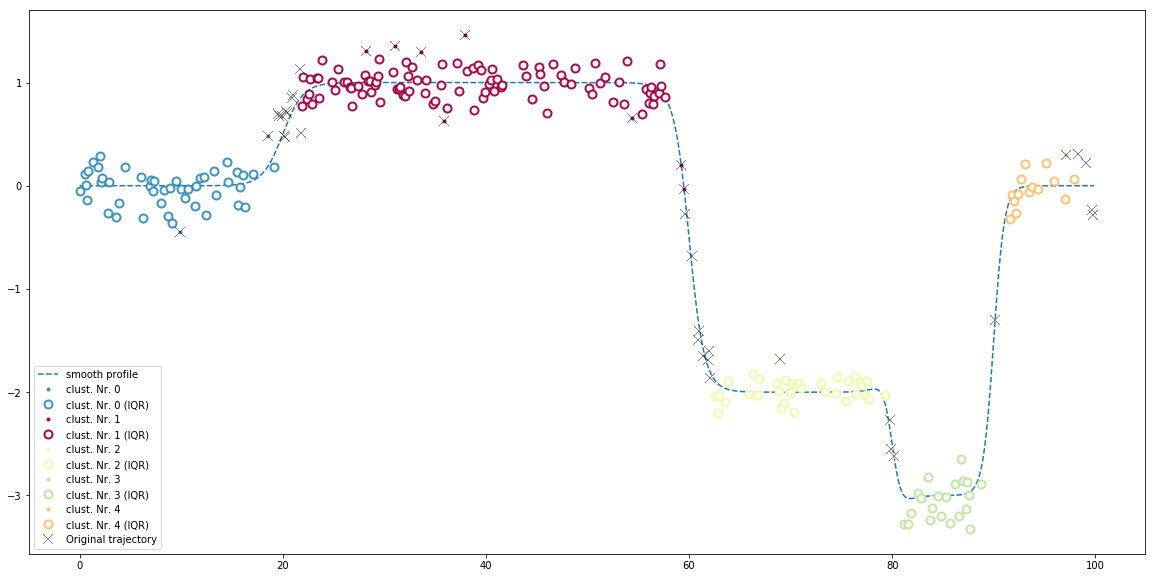

In [253]:
plt.figure(figsize=(20,10))

plt.plot(xxx, yyy, '--', label='smooth profile')


iqr_points_kwargs={'marker':'o', 'markeredgewidth':2.0, 'markerfacecolor':'w', 
                   'linestyle':'', 'color':'k', 'markersize':8.0, 'alpha':0.95, 
                   'label':'label'}

all_points_kwargs={'marker':'.', 'markeredgewidth':2.0, 'markerfacecolor':'w', 
                   'linestyle':'', 'color':'k', 'markersize':4.0, 'alpha':0.95, 
                   'label':'label'}

    
def get_new_kwargs(kwargs_dct):
    
    def meth(color, label):
        kwargs_dct.update({'color':color,'label':label})
        return kwargs_dct
    return meth
        
pdf = pd.DataFrame()
pdf_all = pd.DataFrame({'x':xxxx,'y':yyyy})

for cl_nr, clust in enumerate(clusters):
    
    color=colors[cl_nr]   
    
    xs = xxxx[clust]
    ys = yyyy[clust]
    
    label=f'clust. Nr. {cl_nr}'
    plt.plot(xs, ys, **get_new_kwargs(all_points_kwargs)(color,label))
    
    label=f'clust. Nr. {cl_nr} (IQR)'
    mask=get_iqr_masked(ys,1)
    plt.plot(xs[mask], ys[mask], **get_new_kwargs(iqr_points_kwargs)(color,label))

    pdf1  = pd.DataFrame({'x':xs[mask],'yy':ys[mask]})
    #pdf2  = pd.DataFrame({'x':rxs[rmask],'y':rys[rmask]})
    #pdf = pdf1.merge(pdf2, on=['x'], how='outer')
    pdf = pd.concat([pdf,pdf1])

# plot the rest of the samples
pdf_all = pdf_all.merge(pdf, on=['x'], how='outer')
pdf_all['keep'] = pdf_all.yy.apply(np.isnan)
pdf_sub = pdf_all[pdf_all['keep']]
plt.plot(pdf_sub.x.values, pdf_sub.y.values, alpha=0.95, linestyle='',color='k', marker='x', markersize=10.0, markeredgewidth=0.40, linewidth=0.50, label='Original trajectory')

plt.legend();

In [254]:
clusters_rev = get_batch_clusters(np.max(xxxx)-xxxx[::-1],yyyy[::-1],0.6,time_thresh)
len(clusters_rev)

STD-testing at 9 0.21411616540344142 0.21411616540344142 0.6
STD-testing at 20 0.33725458576799855 0.33725458576799855 0.6
		refinement 34 1.4812574877091313 1.4812574877091313
		refinement 33 1.4812574877091313 1.4812574877091313
		refinement 32 1.4682744221064454 1.4682744221064454
		refinement 31 1.456876213674116 1.456876213674116
		refinement 30 1.433728177331814 1.433728177331814
		refinement 29 1.4142000045978584 1.4142000045978584
		refinement 28 1.376127588064172 1.376127588064172
		refinement 27 1.3512745159393063 1.3512745159393063
		refinement 26 1.300609957317459 1.300609957317459
		refinement 25 1.274302647448516 1.274302647448516
		refinement 24 1.2261323682492928 0.33725458576799855
		refinement 23 1.1411188833711718 0.33725458576799855
		refinement 22 1.0575114444018114 0.33725458576799855
		refinement 21 0.9307211273559477 0.1916117020299233
		refinement 20 0.6827711299165183 0.1916117020299233
STD-testing at 34 0.33725458576799855 0.33725458576799855 0.6
Trying 20 cl

3

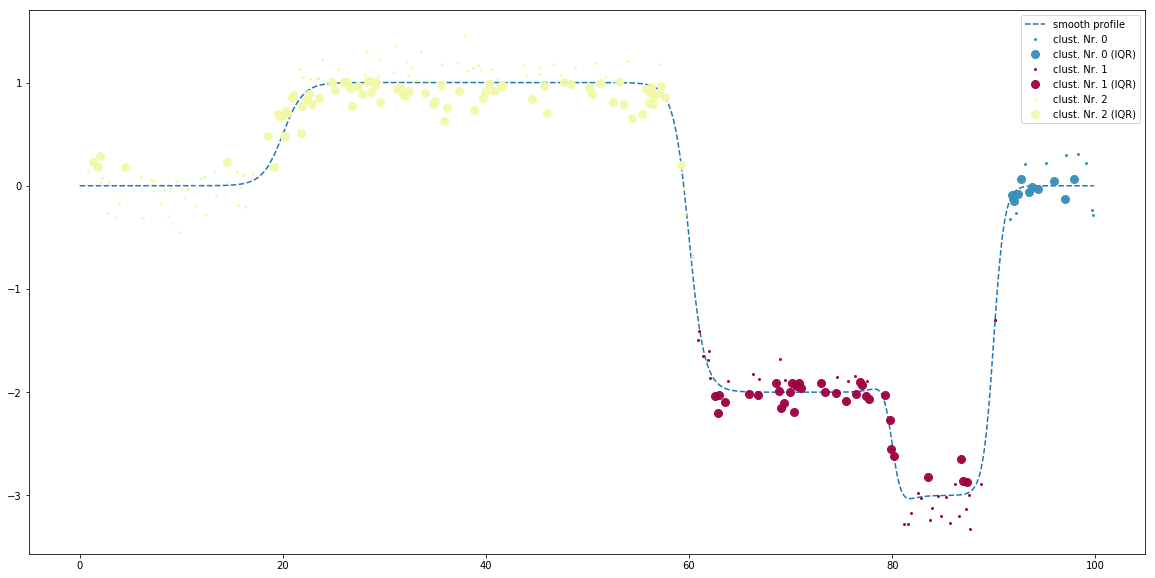

In [255]:
plt.figure(figsize=(20,10))

plt.plot(xxx, yyy, '--', label='smooth profile')

for cl_nr, clust in enumerate(clusters_rev):
    
    xs = xxxx[::-1][clust]
    ys = yyyy[::-1][clust]
    
    plt.plot(xs, ys, '.', alpha=0.95, color=colors[cl_nr], markersize=4.0, label=f'clust. Nr. {cl_nr}')

    q25 = np.quantile(ys,0.25, interpolation='lower')
    q75 = np.quantile(ys,0.75, interpolation='higher')

    iqr = abs(q75 - q25)
    iqr_fact = 3

    iqr_fact = 0
    
    mask=np.where((ys > (q25 - iqr_fact * iqr)) & (ys < (q75 + iqr_fact * iqr)))
    
    plt.plot(xs[mask], ys[mask], 'o', color=colors[cl_nr], markersize=8.0, alpha=0.95, label=f'clust. Nr. {cl_nr} (IQR)')
    
    
plt.legend();

60.300000000000004 0.8
0.8 60.300000000000004
90.10000000000001 60.300000000000004
60.300000000000004 90.10000000000001
99.80000000000001 90.10000000000001
90.10000000000001 99.80000000000001


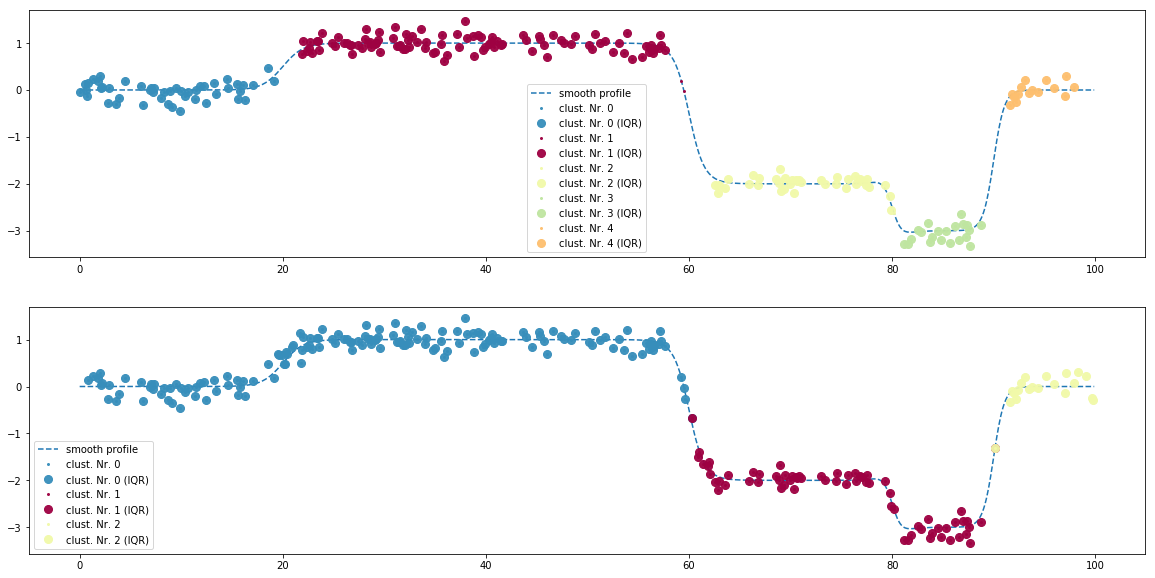

In [257]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
ax = ax.reshape(2,)

ax[0].plot(xxx, yyy, '--', label='smooth profile')
ax[1].plot(xxx, yyy, '--', label='smooth profile')

for cl_nr, clust in enumerate(clusters):
    
    xs = xxxx[clust]
    ys = yyyy[clust]
    
    ax[0].plot(xs, ys, '.', alpha=0.95, color=colors[cl_nr], markersize=4.0, label=f'clust. Nr. {cl_nr}')

    q25 = np.quantile(ys,0.25, interpolation='lower')
    q75 = np.quantile(ys,0.75, interpolation='higher')

    iqr = abs(q75 - q25)
    iqr_fact = 3

    mask=np.where((ys > (q25 - iqr_fact * iqr)) & (ys < (q75 + iqr_fact * iqr)))
    
    ax[0].plot(xs[mask], ys[mask], 'o', color=colors[cl_nr], markersize=8.0, alpha=0.95, label=f'clust. Nr. {cl_nr} (IQR)')
    
    ax[0].legend()
    
for cl_nr, clust in enumerate(clusters_rev[::-1]):

    xs = xxxx[::-1][clust]
    ys = yyyy[::-1][clust]
    
    print(xs[0],xs[-1])    
    xs = xs[::-1]
    print(xs[0],xs[-1])
    
    ys = ys[::-1]
    ax[1].plot(xs, ys, '.', alpha=0.95, color=colors[cl_nr], markersize=4.0, label=f'clust. Nr. {cl_nr}')

    q25 = np.quantile(ys,0.25, interpolation='lower')
    q75 = np.quantile(ys,0.75, interpolation='higher')

    iqr = abs(q75 - q25)
    iqr_fact = 3

    mask=np.where((ys > (q25 - iqr_fact * iqr)) & (ys < (q75 + iqr_fact * iqr)))
    
    ax[1].plot(xs[mask], ys[mask], 'o', color=colors[cl_nr], markersize=8.0, alpha=0.95, label=f'clust. Nr. {cl_nr} (IQR)')
    
    ax[1].legend();

## Notes
* need to ensure the time-backward trajectory works in roughly the same way as the time-forward one
* need to have something that merges nearby clusters if they are close enough in time and space

In [258]:
import pandas as pd

0.0 19.1
0.0 19.1
21.900000000000002 59.5
21.900000000000002 59.5
62.6 80.2
62.6 80.2


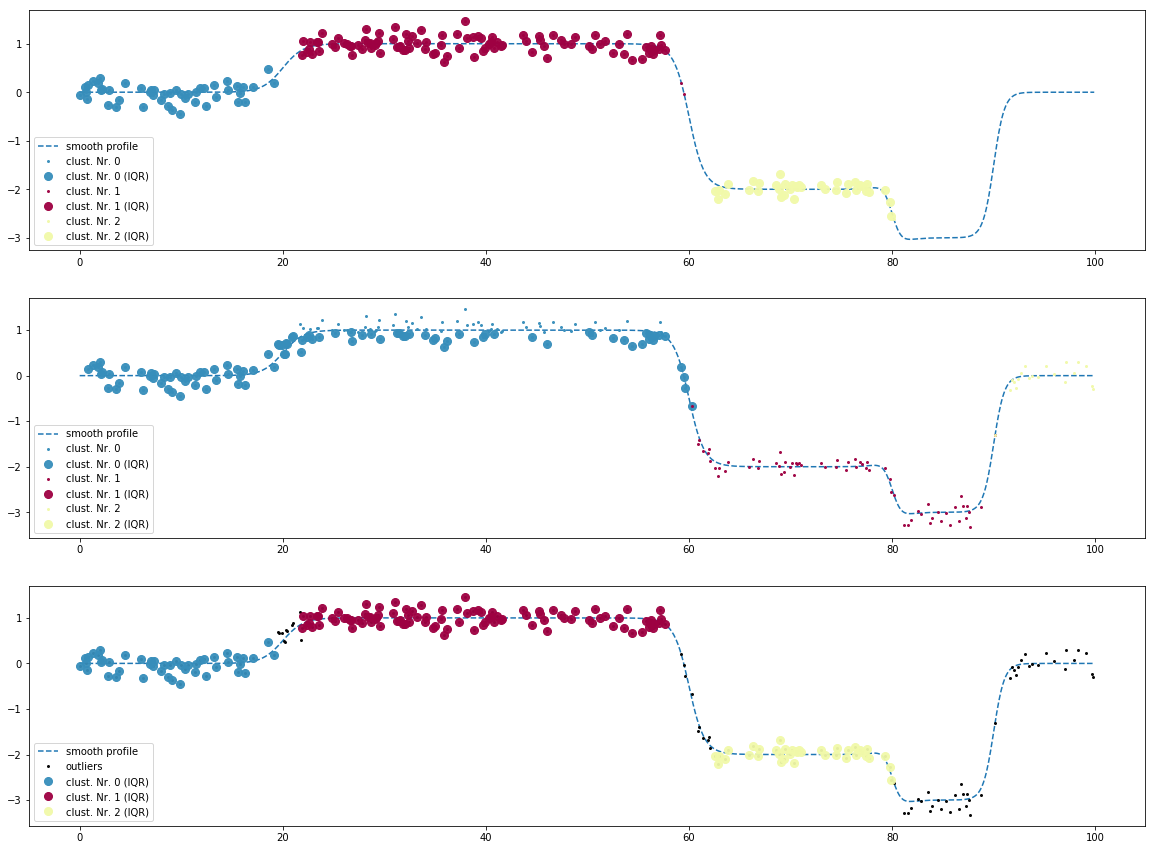

In [259]:
fig, ax = plt.subplots(3,1, figsize=(20,15))
ax = ax.reshape(3,)

ax[0].plot(xxx, yyy, '--', label='smooth profile')
ax[1].plot(xxx, yyy, '--', label='smooth profile')
ax[2].plot(xxx, yyy, '--', label='smooth profile')
ax[2].plot(xxxx, yyyy, '.', alpha=0.95, color='k', markersize=4.0, label='outliers')    

get_match = lambda x,y: (np.isnan(x) | np.isnan(x))
get_val = lambda x,y: x if np.isnan(x)==False else y

cl_nr = 0

for clust, rclust in zip(clusters,clusters_rev[::-1]):
    
    xs = xxxx[clust]
    ys = yyyy[clust]
    
    ax[0].plot(xs, ys, '.', alpha=0.95, color=colors[cl_nr], markersize=4.0, label=f'clust. Nr. {cl_nr}')

    q25 = np.quantile(ys,0.25, interpolation='lower')
    q75 = np.quantile(ys,0.75, interpolation='higher')

    iqr = abs(q75 - q25)
    iqr_fact = 3

    mask=np.where((ys > (q25 - iqr_fact * iqr)) & (ys < (q75 + iqr_fact * iqr)))
    
    ax[0].plot(xs[mask], ys[mask], 'o', color=colors[cl_nr], markersize=8.0, alpha=0.95, label=f'clust. Nr. {cl_nr} (IQR)')
    
    ax[0].legend()
    
    pdf1  = pd.DataFrame({'x':xs[mask],'y':ys[mask]})

    
    rxs = xxxx[::-1][rclust]
    rys = yyyy[::-1][rclust]
    
    print(xs[0],xs[-1])    
    rxs = rxs[::-1]
    print(xs[0],xs[-1])
    
    rys = rys[::-1]
    ax[1].plot(rxs, rys, '.', alpha=0.95, color=colors[cl_nr], markersize=4.0, label=f'clust. Nr. {cl_nr}')

    q25 = np.quantile(ys,0.25, interpolation='lower')
    q75 = np.quantile(ys,0.75, interpolation='higher')

    iqr = abs(q75 - q25)
    iqr_fact = 3

    rmask=np.where((rys > (q25 - iqr_fact * iqr)) & (rys < (q75 + iqr_fact * iqr)))
    
    ax[1].plot(rxs[rmask], rys[rmask], 'o', color=colors[cl_nr], markersize=8.0, alpha=0.95, label=f'clust. Nr. {cl_nr} (IQR)')
    
    ax[1].legend();
    
    pdf2  = pd.DataFrame({'x':rxs[rmask],'ry':rys[rmask]})    
    
    pdf = pdf1.merge(pdf2, on=['x'], how='outer')
    #pdf = pd.concat([pdf,pdf1.merge(pdf2, on=['x'], how='outer')])
    
    pdf['matched'] = pdf.apply(lambda x: get_match(x['y'],x['ry']), axis=1)
    pdf['yy'] = pdf.apply(lambda x: get_val(x['y'],x['ry']), axis=1)

    
    ax[2].plot(pdf[pdf['matched']==False].x.values, pdf[pdf['matched']==False].y.values, 'o', color=colors[cl_nr], markersize=8.0, alpha=0.95, label=f'clust. Nr. {cl_nr} (IQR)')
    
    #ax[2].plot(pdf[pdf['matched']].x.values, pdf[pdf['matched']].yy.values, '.', alpha=0.95, color='k', markersize=4.0, label=None)


    ax[2].legend();    
    
    cl_nr += 1

## Refinement

In [150]:
import random

In [151]:
yyyy_[class_member_mask & ~core_samples_mask].shape

NameError: name 'class_member_mask' is not defined

In [ ]:
eps=0.04
min_samples = 5

coarse_unique_labels = set(labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 10)]
random.shuffle(colors)

fig, ax = plt.subplots(2,1, figsize=[20,10])

ax = ax.reshape(2)

ax[0] = plot_regular(labels, core_samples_mask, xxxx_, yyyy_, ax[0])

color_n = 0 
# iterate through the new labeled clusters
# redo dbscan for each cluster
# remove the outliers 
for coarse_label in coarse_unique_labels:

    if coarse_label == -1:
        
        coarse_cluster_mask = (labels == coarse_label)

        x = xxxx_[coarse_cluster_mask]
        y = yyyy_[coarse_cluster_mask]  

        ax[1].plot(x,y, 'o', markersize=12, 
                markerfacecolor='grey', markeredgecolor='grey', markeredgewidth=0,
                alpha=0.5, label='{}'.format(-1))
     
    else:
        # Mask the new events according the the updated labels
        coarse_cluster_mask = (labels == coarse_label)
        xx_coarse = xxxx_[coarse_cluster_mask]
        yy_coarse = yyyy_[coarse_cluster_mask]   
        coarse_std = np.std(yy_coarse)
        
        #print(xx_coarse.size, yy_coarse.size)
        
        # don't need to do this? or check this?
        #newnew_X = StandardScaler().fit_transform(yy_coarse)
        newnew_X = yy_coarse
        #print(newnew_X.size)    

        # Rerun DBScan with a smaller eps-param?
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(yy_coarse)
        fine_core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        fine_core_samples_mask[db.core_sample_indices_] = True
        fine_cluster_labels = db.labels_

        fine_n_clusters_ = len(set(fine_cluster_labels)) - (1 if -1 in fine_cluster_labels else 0)
        fine_n_noise_ = list(fine_cluster_labels).count(-1)

        metric_str = '\nFor coarse cluster=%d, coarse std = %f,\n\teps: %f, nr. clusters: %d, nr noise points: %d' \
            % (coarse_label, coarse_std, eps, fine_n_clusters_, fine_n_noise_)

        sil_sco = -1
        if np.unique(fine_cluster_labels).size>1:
            sil_sco = metrics.silhouette_score(yy_coarse, fine_cluster_labels)
            add_str = ", Silhouette Coefficient: %0.3f" % sil_sco
        else:
            add_str=''

        print(metric_str + add_str)

        fine_unique_labels = set(fine_cluster_labels)

        # Loop over the new refined clusters to exclude the noise
        # Black removed and is used for noise instead.
        col = colors[color_n]

        for fine_label in fine_unique_labels:

            if fine_label==-1:
                
                col = [0, 0, 0, 1]                
                fine_cluster_mask = (fine_cluster_labels == -1)
                x = xx_coarse[fine_cluster_mask]
                y = yy_coarse[fine_cluster_mask]  

                ax[1].plot(x,y, 'o', markerfacecolor=tuple(col),
                             markeredgecolor='k', markersize=6, label=f'{fine_label}')
                    
                fine_std = np.std(y)
                
            else:

                fine_cluster_mask = (fine_cluster_labels == fine_label)

                x = xx_coarse[fine_cluster_mask & fine_core_samples_mask]
                y = yy_coarse[fine_cluster_mask & fine_core_samples_mask]    

                ax[1].plot(x,y, 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=14, label='{}{}, core'.format(coarse_label, fine_label))

                x = xx_coarse[fine_cluster_mask & ~fine_core_samples_mask]
                y = yy_coarse[fine_cluster_mask & ~fine_core_samples_mask]  

                ax[1].plot(x,y, 'o', markerfacecolor=tuple(col),
                         markeredgecolor='k', markersize=6, label='{}{}, non'.format(coarse_label, fine_label))

                y_mean = yy_coarse[fine_cluster_mask].mean()
                ax[1].plot([xxxx_[0],xxxx_[-1]],[y_mean, y_mean], '--', color=tuple(col), label='{}{}, mean'.format(coarse_label, fine_label))    

                fine_std = np.std(yy_coarse[fine_cluster_mask])
        
            print(f"\tfine cluster={fine_label}, fine std = {fine_std}")
        
        color_n += 1
    plt.legend()